In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


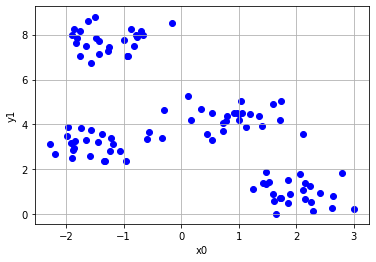

In [4]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(X[:,0], X[:,1], c='blue', label='group1')

# ax.set_title('third scatter plot')
ax.set_xlabel('x0')
ax.set_ylabel('y1')

ax.grid(True)

# ax.legend(loc='upper left')
fig.show()

 ## 【問題1】中心点の初期値を決める
入力されたデータから 
K
 個の中心点 
μ
1
 から 
μ
K
 の初期値を決めるコードを作成してください。
K
 は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点 
X
n
 の中からランダムに 
K
 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 
μ
 の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

 ## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する 
r
n
k
 と 
μ
k
 を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

 ## 【問題3】クラスタへの割り当て
全てのデータ点 
X
n
 を最も近い中心点 
μ
k
 に割り当てるコードを作成してください。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル 
p
,
q
 に対しては以下の数式で表現できます。

 ## 【問題4】中心点の移動
中心点 
μ
k
 を 
k
 番目のクラスタに割り当てられる全てのデータ点 
X
n
 の平均値（重心）に移動するコードを作成してください。

クラスタの割り当て 
r
n
k
 を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません

In [5]:
#初期値を求める
n_clusters = 4
a = range(X.shape[0])
np.random.seed(0)
# first_point = np.random.permutation(a)[:n_clusters]
first_point = np.random.choice(a, n_clusters, replace=False)
first_co = X[first_point,:]
first_co

array([[-0.565433  ,  3.65813966],
       [ 1.60161834,  0.92363636],
       [ 1.35678894,  4.36462484],
       [-1.26041884,  7.46644456]])

In [6]:
# dist = np.zeros((n_clusters, X.shape[0]))

def cal_SSE(X=X):
    dist = np.zeros((X.shape[0], n_clusters))
#     for i, j in enumerate(first_point): #データ点のインデックス
    for l in range(n_clusters):
        d_a = abs(X - first_co[l,:])
#         print(d_a)
        d_a2 = d_a ** 2
        d_a3 = np.sum(d_a2, axis=1)   
#             print(d_a3.shape,"d_a3")
        dist[:,l] = d_a3 
#         print(dist)
    SSE = 0
    clster = np.argmin(dist,axis=1)
    print(clster)
    for i in range(n_clusters):
#         print(dist[clster==i].shape)
        SSE += np.sum(np.min(dist[clster==i],axis=1))
        
#         print(np.mean(X[clster==i], axis=1))
        first_co[i,:] = np.mean(X[clster==i], axis=0)
#         print(SSE)
    return dist, SSE, first_co

In [7]:
d, sse, first_co = cal_SSE()
# print(d[:10])
# print(sse)
print(first_co)

[2 3 2 2 2 2 0 3 2 3 3 3 3 3 3 1 1 0 0 1 2 3 0 1 2 0 0 2 1 1 1 3 1 1 0 2 3
 1 3 0 2 0 3 0 0 3 1 0 2 0 2 1 0 0 0 3 3 1 1 3 3 1 1 2 1 3 0 0 1 2 3 1 2 3
 2 2 0 0 1 1 1 3 0 0 1 0 1 1 2 2 2 0 0 0 0 3 3 0 3 0]
[[-1.24587768  3.22980708]
 [ 1.99186903  0.96561071]
 [ 1.06148307  4.39922699]
 [-1.26811733  7.76378266]]


In [8]:
d, sse, dist = cal_SSE()
print(d[:10])
print(sse)

[2 3 2 2 2 2 0 3 2 3 3 3 3 3 3 1 1 0 0 1 2 3 0 1 2 0 0 2 1 1 1 3 1 1 0 2 3
 1 3 0 2 0 3 0 0 3 1 0 2 2 2 1 0 0 0 3 3 1 1 3 3 1 1 2 1 3 0 0 1 2 3 1 2 3
 2 2 0 0 1 1 1 3 0 2 1 0 1 1 2 2 2 0 2 0 0 3 3 0 3 2]
[[4.10201765e+00 9.16618233e+00 5.86279912e-01 2.03610833e+01]
 [2.28807616e+01 6.41525540e+01 2.14821006e+01 4.34694272e-01]
 [8.06168487e+00 1.19566237e+01 8.84028654e-02 1.84444068e+01]
 [6.88358328e+00 1.33216271e+01 8.82864579e-03 1.60899179e+01]
 [1.08564272e+01 1.56789718e+01 5.36611623e-01 1.63496959e+01]
 [4.96636188e+00 1.16194454e+01 1.38579186e-01 1.72458494e+01]
 [9.20017779e-01 2.40500656e+01 9.39136514e+00 1.56141249e+01]
 [2.18402837e+01 5.54457264e+01 1.54777896e+01 2.57930809e-01]
 [6.07410465e+00 2.20990040e+01 1.65480569e+00 8.10885807e+00]
 [2.01588246e+01 5.72933340e+01 1.72211414e+01 2.94409388e-02]]
50.912773104155825


In [9]:
np.argmin(d,axis=1)

array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2])

In [10]:
clster = np.argmin(d,axis=1)
clster

array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2])

In [11]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, max_iter, verbose=False, tol=5, seed=0):  #n_init,  tol,
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.seed = seed
#         self.n_init = n_init
        self.max_iter = max_iter
        self.tol= tol
        self.verbose = verbose



    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        self.a = range(X.shape[0])
        np.random.seed(self.seed)
        self.first_point = np.random.choice(self.a, self.n_clusters, replace=False)
        self.first_co = X[self.first_point,:] #初期の座標
        self.new_co = np.zeros((self.n_clusters, X.shape[1]))
        self.SSE_Rec = []
        
        for i in range(self.max_iter):
            
#             self.cal_SSE(X)
            
            self.dist = np.zeros((X.shape[0], self.n_clusters))
            self.yk =  np.zeros((X.shape[0], self.n_clusters))

            
            for l in range(self.n_clusters):
#                 print(self.first_co[l,:])
                self.d_a = abs(X - self.first_co[l,:])
                self.d_a2 = self.d_a ** 2
                self.d_a3 = np.sum(self.d_a2, axis=1) 
                self.dist[:,l] = self.d_a3
                for j in range(X.shape[0]):
                    self.yk[j,l] = np.linalg.norm(X[j,:] - self.first_co[l,:]) #各クラスターとのユークリッド距離を格納
#             print("ykk",self.yk)
                
            self.SSE = 0 
#             self.clster = np.argmin(self.dist,axis=1)
            self.clster = np.argmin(self.yk, axis=1)
        
            
            for i in range(self.n_clusters):
#                 print(self.clster)
                self.SSE += np.sum(np.min(self.dist[self.clster==i],axis=1))
#                 print(self.SSE,"SSE")
                self.first_co[i,:] = np.mean(X[self.clster==i],axis=0)
#                 print(self.first_co, "first_co")
#                 print(self.new_co, "new_co")
#                 print(np.sum(self.first_co == self.new_co))
#             print(np.mean(np.sqrt(np.sum(abs(self.first_co**2-self.new_co**2),axis=1))),"#######")
    
    
            if np.mean(np.sqrt(np.sum(abs(self.first_co**2 - self.new_co**2), axis=1))) <= self.tol: 
                break
                
                
                

            if (self.first_co == self.new_co).all == True:
                break
            else:
#                 print(self.first_co, "first_co")
#                 print("=============")
#                 print(self.new_co, "new_co")
#                 print("~~~~~~~~~~~~~")
                self.new_co = np.copy(self.first_co)
                
                
            self.SSE_Rec.append(self.SSE)
#             print(self.SSE, "SSE")
            
        if self.verbose:
            print(self.SSE_Rec)
  
        return self.clster



    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        self.pre_dist = np.zeros((X.shape[0], self.n_clusters))
        for l in range(self.n_clusters):
#             self.pre_d_a = abs(X - self.new_co[l,:])
#             self.pre_d_a2 = self.pre_d_a ** 2
#             self.pre_d_a3 = np.sum(self.pre_d_a2, axis=1) 
#             self.pre_dist[:,l] = self.pre_d_a3

            for j in range(X.shape[0]):
                self.pre_dist[j,l] = np.linalg.norm(X[j,:] - self.new_co[l,:])
                
        self.pre_clster = np.argmin(self.pre_dist,axis=1)
        
        return self.pre_clster

In [12]:
KM = ScratchKMeans(n_clusters = 4, max_iter = 10, verbose=True, tol=0.05)

In [13]:
KM.fit(X)

[84.33640249455568, 50.912773104155825]


array([2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 2, 3,
       0, 1, 2, 0, 0, 2, 1, 1, 1, 3, 1, 1, 0, 2, 3, 1, 3, 0, 2, 0, 3, 0,
       0, 3, 1, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 3,
       0, 0, 1, 2, 3, 1, 2, 3, 2, 2, 0, 0, 1, 1, 1, 3, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 2, 0, 0, 3, 3, 0, 3, 2])

In [14]:
cl = KM.predict(X)

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


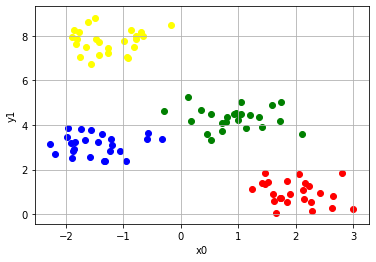

In [15]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(X[:,0][cl==0], X[:,1][cl==0], c='blue', label='group0')
ax.scatter(X[:,0][cl==1], X[:,1][cl==1], c='red', label='group1')
ax.scatter(X[:,0][cl==2], X[:,1][cl==2], c='green', label='group2')
ax.scatter(X[:,0][cl==3], X[:,1][cl==3], c='yellow', label='group3')



# ax.set_title('third scatter plot')
ax.set_xlabel('x0')
ax.set_ylabel('y1')

ax.grid(True)

# ax.legend(loc='upper left')
fig.show()

 ## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。

複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
μ
k
 を保持しておきます。

In [16]:
KM = ScratchKMeans(n_clusters = 3, max_iter = 10, verbose=True, tol=0, seed=1)

In [17]:
KM.fit(X)

[1764.6038326746107, 437.43951195640506, 420.2195283854711, 418.8543089744332, 418.2109500143536, 417.41642585641245, 417.30340405266253, 416.6369660273467, 408.877920866098, 383.2642982799094]


array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2])

 ## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

データ点 
X
n
 と学習で決まった中心点 
μ
k
 に対し、 
S
S
E
 を最小化する 
r
n
k
 を選ぶ。
具体的には次のことです。

データ点 
X
n
 を最も近い 
μ
k
 に割り当てる。

In [18]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, _, test_size=0.3, random_state=0,
)

In [19]:
KM = ScratchKMeans(n_clusters = 4, max_iter = 15, verbose=True, tol=0, seed=1)
KM.fit(X_train)

[445.34442338044715, 150.94139280748257, 133.768643548361, 57.09421170745124]


array([0, 2, 1, 2, 2, 1, 3, 0, 1, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 1, 3, 0,
       1, 3, 2, 1, 0, 1, 2, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 1, 2, 2, 1, 3,
       0, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       3, 2, 3, 3])

In [20]:
cl = KM.predict(X_test)

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


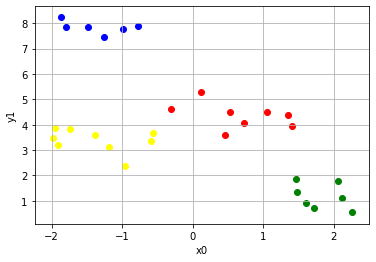

In [21]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(X_test[:,0][cl==0], X_test[:,1][cl==0], c='blue', label='group0')
ax.scatter(X_test[:,0][cl==1], X_test[:,1][cl==1], c='red', label='group1')
ax.scatter(X_test[:,0][cl==2], X_test[:,1][cl==2], c='green', label='group2')
ax.scatter(X_test[:,0][cl==3], X_test[:,1][cl==3], c='yellow', label='group3')



# ax.set_title('third scatter plot')
ax.set_xlabel('x0')
ax.set_ylabel('y1')

ax.grid(True)

# ax.legend(loc='upper left')
fig.show()

 ## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 
k
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k
 を検討するためのコードを作成してください。

SSEを縦軸、クラスタ数 
k
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

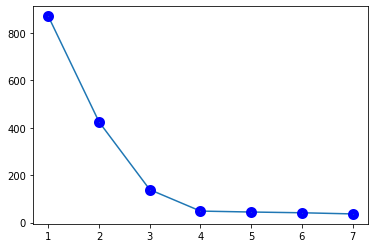

In [22]:
sse = []
n_cl = []
for i in range(1,8):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(X)
    sse.append(KM.SSE)
    

plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="blue",)

 ## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [23]:
Wholesale = pd.read_csv('/Users/naoki/Wholesale customers data.csv')
Wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
Wholesale_drop = Wholesale.drop(["Channel", "Region"], axis=1)
Wholesale_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Wholesale_std = sc.fit_transform(Wholesale_drop)

In [26]:
Wholesale_std[:10]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689],
       [-0.20480553,  0.33406659, -0.29763704, -0.49615501, -0.22813824,
        -0.02622403],
       [ 0.00995035, -0.35231565, -0.10284877, -0.53451222,  0.05428041,
        -0.34785425],
       [-0.34998145, -0.11398095,  0.15535895, -0.28931479,  0.09228619,
         0.36960125],
       [-0.47790091, -0.2914094 , -0.18533618, -0.54585441, -0.2447264 ,
        -0.2750792 ],
       [-0.47449712,  0.7184949 ,  1.1514234 , -0.39448778,  0.95403053,
         0.20346113]])

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_std)
Wholesale_pca = pca.transform(Wholesale_std)

In [28]:
Wholesale_pca[:10]

array([[ 0.19329055, -0.30509996],
       [ 0.4344199 , -0.32841262],
       [ 0.81114323,  0.8150957 ],
       [-0.77864783,  0.65275373],
       [ 0.16628726,  1.27143372],
       [-0.15616993, -0.29514099],
       [-0.3352884 , -0.52500326],
       [ 0.14058643, -0.23099269],
       [-0.51731954, -0.65936283],
       [ 1.59210908, -0.74101133]])

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


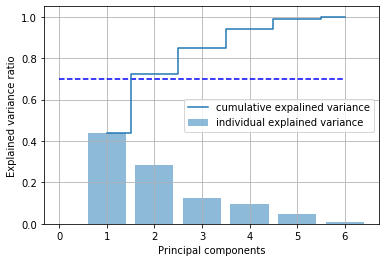

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(Wholesale_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

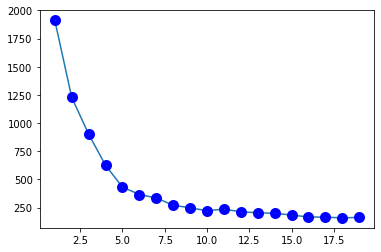

In [30]:
sse = []
n_cl = []
for i in range(1,20):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca)
    sse.append(KM.SSE)
    

plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="blue",)

In [31]:
KM = ScratchKMeans(n_clusters = 10, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)

In [32]:
np.unique(cl).shape[0]

10

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


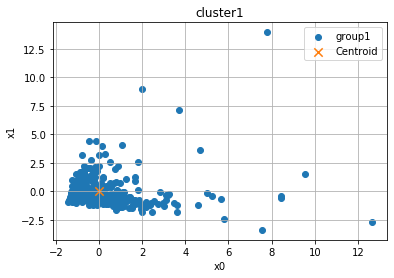

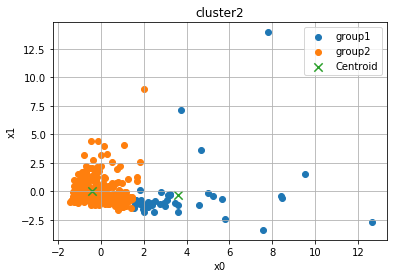

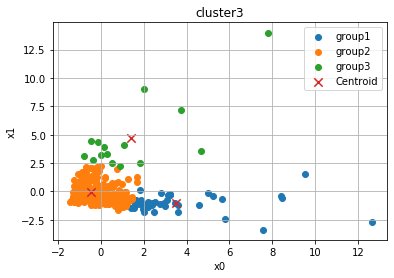

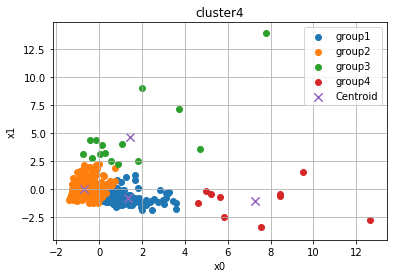

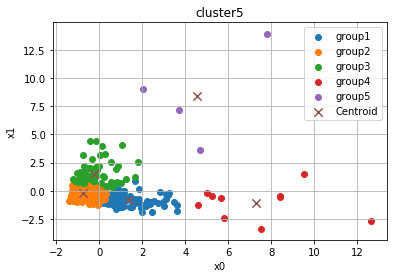

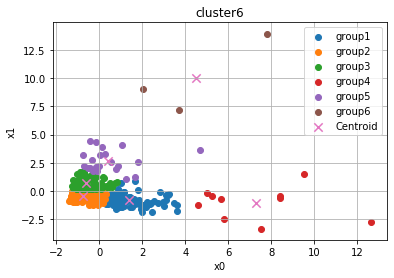

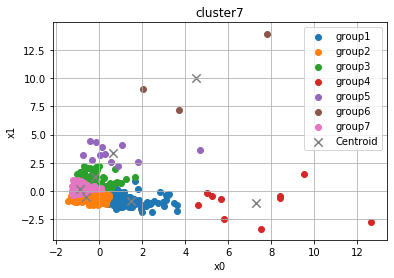

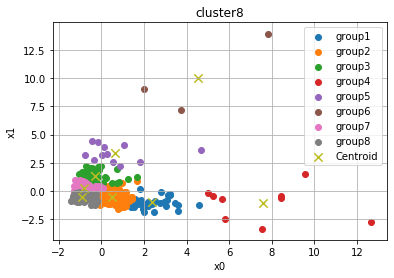

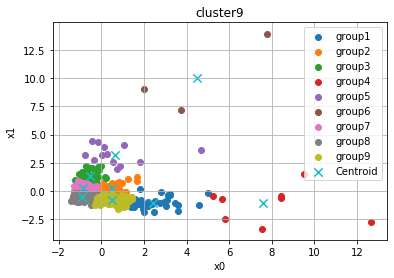

In [33]:


for i in range(1,10):
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca)
    cl = KM.predict(Wholesale_pca)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='group{}'.format(i+1))
    ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster{}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

 - エルボー法によれば、クラスター数が５以上になるとSSEの減少幅が小さくなる。
 - 散布図に色分けしてみると、クラスター数が５になると、外れ値のグループを一つのクラスターとみなしている。
 - よって、クラスター数は５が最適と考えられる。

 ## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


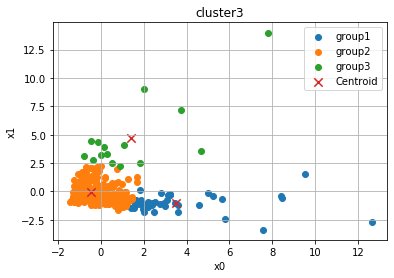

In [34]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 3, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)

cl = KM.predict(Wholesale_pca)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(3):
    ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='group{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')
#     fig.show()    ax.scatter(Wholesale_pca[:,0][cl==j], Wholesale_pca[:,1][cl==j], c='blue', label='group'.format(j))
        

In [35]:
Wholesale["Region"].unique()

array([3, 1, 2])

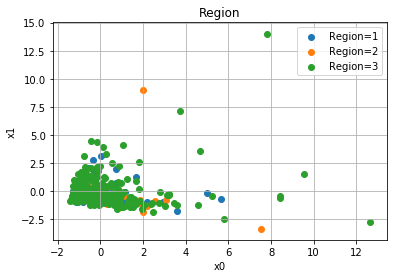

In [36]:
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 1], Wholesale_pca[:,1][Wholesale["Region"] == 1], label = "Region=1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 2], Wholesale_pca[:,1][Wholesale["Region"] == 2], label = "Region=2")
plt.scatter(Wholesale_pca[:,0][Wholesale["Region"] == 3], Wholesale_pca[:,1][Wholesale["Region"] == 3], label = "Region=3")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

 - Regionは、k-meansで分類した場合と異なり、カテゴリー同士の領域の重なりが多い
 - Regionによる分類と、k-meansによる分類は大きく異なる

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


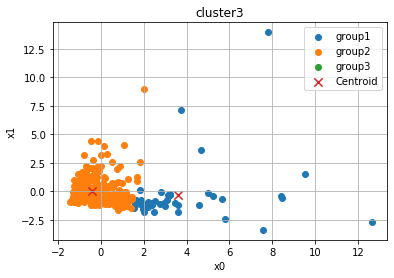

In [37]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)

cl = KM.predict(Wholesale_pca)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(3):
    ax.scatter(Wholesale_pca[:,0][cl==i], Wholesale_pca[:,1][cl==i], label='group{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')
#     fig.show()    ax.scatter(Wholesale_pca[:,0][cl==j], Wholesale_pca[:,1][cl==j], c='blue', label='group'.format(j))

In [38]:
Wholesale["Channel"].unique()

array([2, 1])

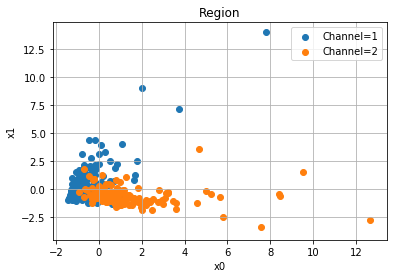

In [39]:
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 1], Wholesale_pca[:,1][Wholesale["Channel"] == 1], label = "Channel=1")
plt.scatter(Wholesale_pca[:,0][Wholesale["Channel"] == 2], Wholesale_pca[:,1][Wholesale["Channel"] == 2], label = "Channel=2")

plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Region')
plt.grid(True)

plt.legend(loc='upper right')

 - ChannelはRegionと比べ、カテゴリ同士が重なっている領域は少ない。
 - Channelによる分類と、k-meansによる分類は大きく異なる

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


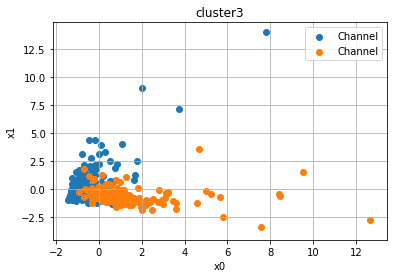

In [40]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)


cl = KM.predict(Wholesale_pca)
fig = plt.figure()

Channel = np.array(Wholesale["Channel"])
ax = fig.add_subplot(1,1,1)
for i in range(1,3):
    ax.scatter(Wholesale_pca[:,0][Wholesale["Channel"]==i], Wholesale_pca[:,1][Wholesale["Channel"]==i], label='Channel')
# ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')
    
# ax.scatter(Wholesale_pca[:,0][Wholesale["Channel"]==1], Wholesale_pca[:,1][Wholesale["Channel"]==1], label='group{}'.format(1))
# ax.scatter(Wholesale_pca[:,0][Wholesale["Channel"]==i], Wholesale_pca[:,1][Wholesale["Channel"]==i], label='group{}'.format(1))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


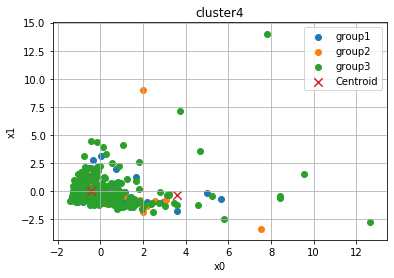

In [41]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)


cl = KM.predict(Wholesale_pca)
fig = plt.figure()

Region = np.array(Wholesale["Region"])
ax = fig.add_subplot(1,1,1)
for i in range(1,4):
    ax.scatter(Wholesale_pca[:,0][Region==i], Wholesale_pca[:,1][Region==i], label='group{}'.format(i))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='x')    
# ax.scatter(Wholesale_pca[:,0][Wholesale["Channel"]==1], Wholesale_pca[:,1][Wholesale["Channel"]==1], label='group{}'.format(1))
# ax.scatter(Wholesale_pca[:,0][Wholesale["Channel"]==i], Wholesale_pca[:,1][Wholesale["Channel"]==i], label='group{}'.format(1))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

In [42]:
Wholesale_log = np.log(Wholesale_drop)

In [43]:
for i in Wholesale_drop.columns:
    Wholesale_log[i] == np.log(Wholesale_drop[i])

In [44]:
Wholesale_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [45]:
pca = PCA(n_components = 2)
pca = pca.fit(Wholesale_log)
Wholesale_pca_log = pca.transform(Wholesale_log)

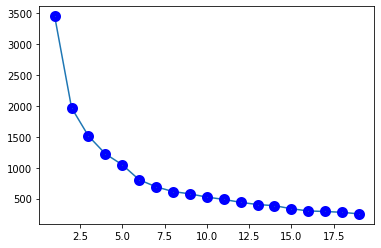

In [46]:
sse = []
n_cl = []
for i in range(1,20):
    n_cl.append(i)
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca_log)
    sse.append(KM.SSE)
    

plt.plot(n_cl, sse, marker="o", markersize=6, markeredgewidth=5, markeredgecolor="blue",)

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


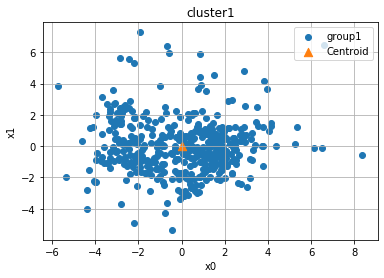

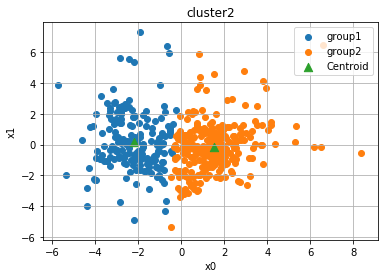

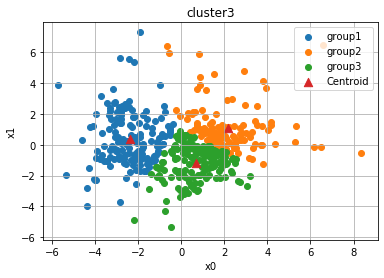

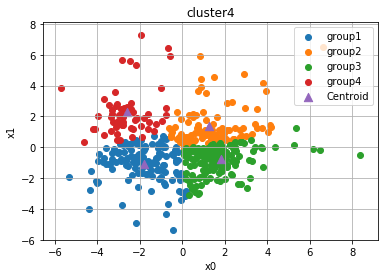

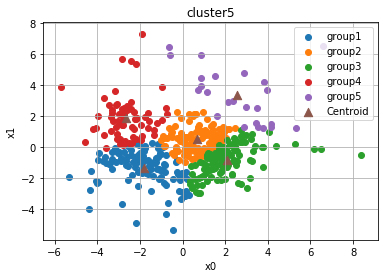

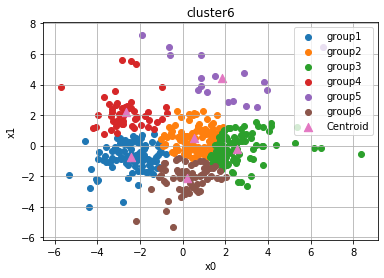

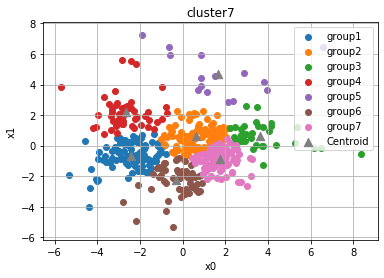

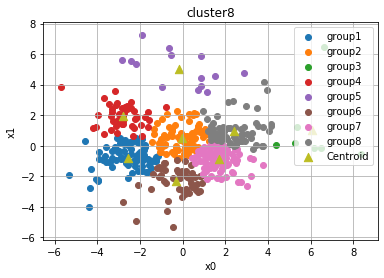

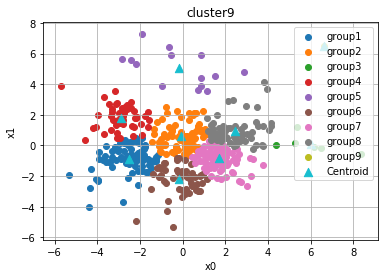

In [47]:
for i in range(1,10):
    KM = ScratchKMeans(n_clusters = i, max_iter = 15, verbose=False, tol=0, seed=3)
    KM.fit(Wholesale_pca_log)
    cl = KM.predict(Wholesale_pca_log)
    
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    for i in range(np.unique(cl).shape[0]):
        ax.scatter(Wholesale_pca_log[:,0][cl==i], Wholesale_pca_log[:,1][cl==i], label='group{}'.format(i+1))
    ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='^')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_title('cluster{}'.format(i+1))
    ax.grid(True)

    ax.legend(loc='upper right')
    fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


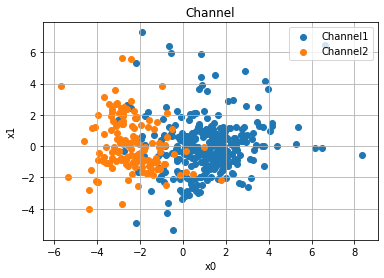

In [48]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca_log)

cl = KM.predict(Wholesale_pca_log)
fig = plt.figure()

Channel = np.array(Wholesale["Channel"])

ax = fig.add_subplot(1,1,1)
for i in range(1,3):
    ax.scatter(Wholesale_pca_log[:,0][Channel==i], Wholesale_pca_log[:,1][Channel==i], label='Channel{}'.format(i))

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title("Channel")
ax.grid(True)

ax.legend(loc='upper right')

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


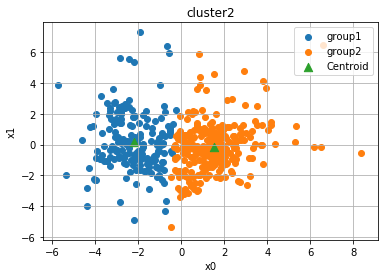

In [49]:
ax = fig.add_subplot(1,1,1)
KM = ScratchKMeans(n_clusters = 2, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca_log)

cl = KM.predict(Wholesale_pca_log)
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(2):
    ax.scatter(Wholesale_pca_log[:,0][cl==i], Wholesale_pca_log[:,1][cl==i], label='group{}'.format(i+1))
ax.scatter(KM.new_co[:,0], KM.new_co[:,1], label="Centroid", s=70, marker='^')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('cluster{}'.format(i+1))
ax.grid(True)

ax.legend(loc='upper right')

In [50]:
Wholesale_drop["cluster"] = cl
Wholesale_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0


In [51]:
Wholesale_cl1 = Wholesale[Wholesale_drop["cluster"] == 1]
Wholesale_cl0 = Wholesale[Wholesale_drop["cluster"] == 0]

In [52]:
Wholesale['Channel'].value_counts(dropna=False)
#1 : ホテル/レストラン/カフェ
#2 : 小売

1    298
2    142
Name: Channel, dtype: int64

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


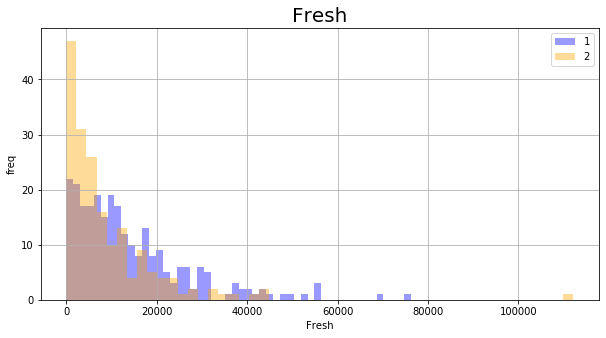

In [53]:
#フレッシュ：新鮮な製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

# sns.distplot(Wholesale_cl0["Fresh"])
# sns.distplot(Wholesale_cl1["Fresh"])
ax1.hist(Wholesale_cl1["Fresh"],bins=50,alpha=0.4, label = "1",color="blue")
ax1.hist(Wholesale_cl0["Fresh"],bins=50, alpha=0.4, label = "2", color="orange")

ax1.set_title('Fresh',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


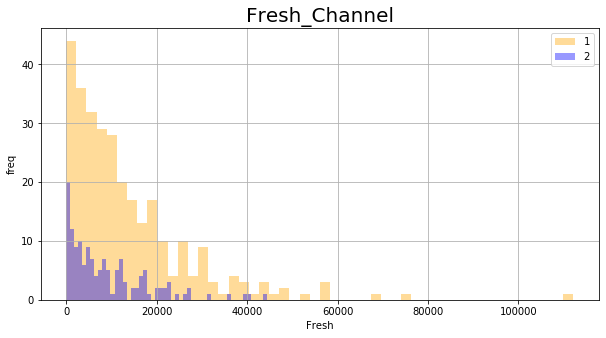

In [54]:
#フレッシュ：新鮮な製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1",color="orange")
ax1.hist(Wholesale["Fresh"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2", color="blue")
ax1.set_title('Fresh_Channel',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


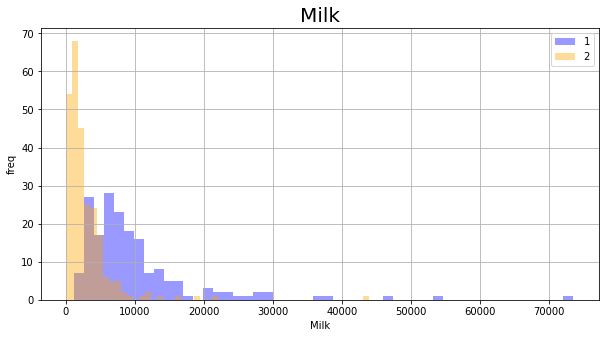

In [55]:
#MILK：乳製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale_cl0["Milk"],bins=50, alpha=0.4, label = "1", color="blue")
ax1.hist(Wholesale_cl1["Milk"],bins=50, alpha=0.4, label = "2", color="orange")
ax1.set_title('Milk',size=20)
ax1.set_xlabel('Milk')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


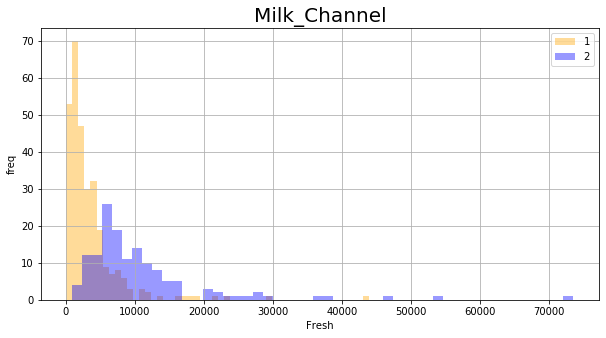

In [56]:
#フレッシュ：新鮮な製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1",color="orange")
ax1.hist(Wholesale["Milk"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2", color="blue")
ax1.set_title('Milk_Channel',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


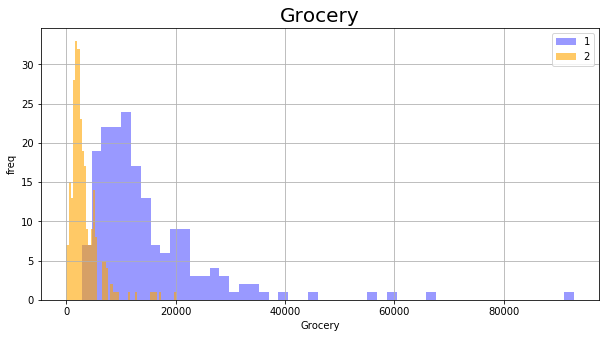

In [57]:
# 食料品：食料品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale_cl0["Grocery"],bins=50, alpha=0.4, label = "1", color="blue")
ax1.hist(Wholesale_cl1["Grocery"],bins=50, alpha=0.6, label = "2",  color="orange")
ax1.set_title('Grocery',size=20)
ax1.set_xlabel('Grocery')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


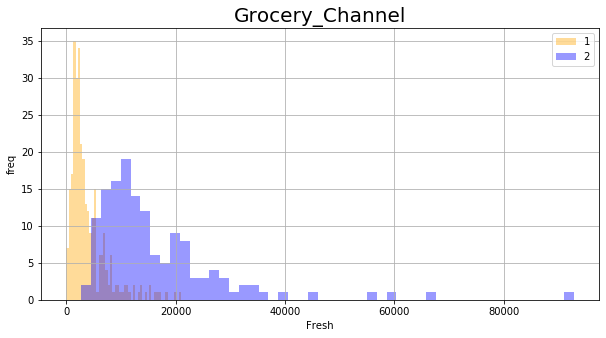

In [58]:
#フレッシュ：新鮮な製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1",color="orange")
ax1.hist(Wholesale["Grocery"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2", color="blue")
ax1.set_title('Grocery_Channel',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


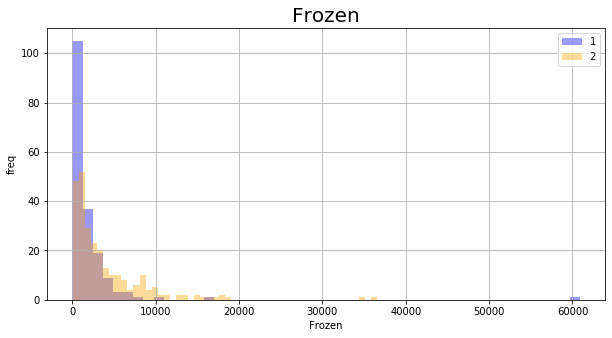

In [59]:
# FROZEN：冷凍製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale_cl0["Frozen"],bins=50, alpha=0.4, label = "1", color="blue")
ax1.hist(Wholesale_cl1["Frozen"],bins=50, alpha=0.4, label = "2", color="orange")
ax1.set_title('Frozen',size=20)
ax1.set_xlabel('Frozen')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


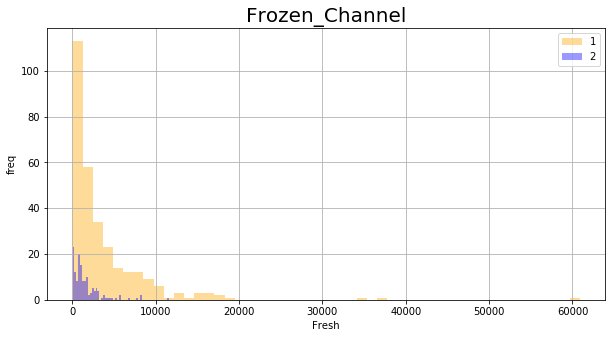

In [60]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1",color="orange")
ax1.hist(Wholesale["Frozen"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2", color="blue")
ax1.set_title('Frozen_Channel',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


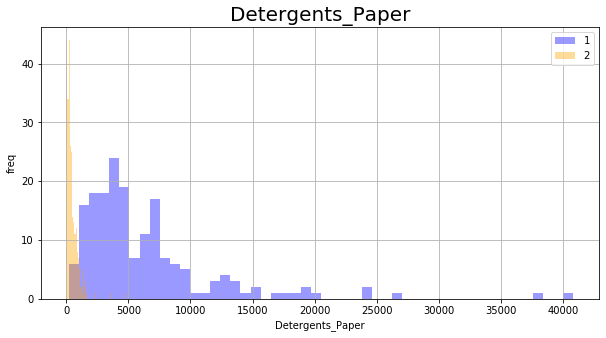

In [61]:
# DETERGENTS_PAPER：洗剤および紙製品の年間支出

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale_cl0["Detergents_Paper"],bins=50, alpha=0.4, label = "1", color="blue")
ax1.hist(Wholesale_cl1["Detergents_Paper"],bins=50, alpha=0.4, label = "2", color="orange")
ax1.set_title('Detergents_Paper',size=20)
ax1.set_xlabel('Detergents_Paper')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


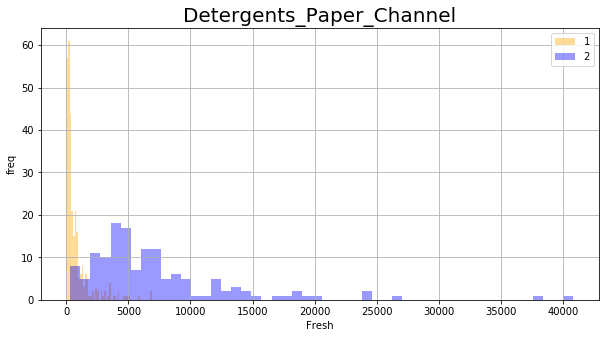

In [62]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1",color="orange")
ax1.hist(Wholesale["Detergents_Paper"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2", color="blue")
ax1.set_title('Detergents_Paper_Channel',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


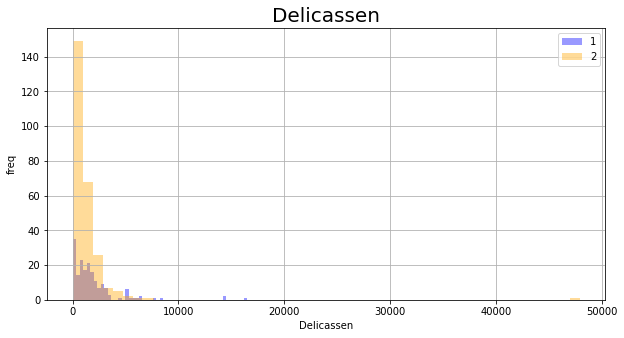

In [63]:
#DELICATESSEN：年間支出（mu）およびデリカテッセン製品、、サンドイッチや持ち帰り用の西洋風惣菜を売る飲食店である

fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale_cl0["Delicassen"],bins=50, alpha=0.4, label = "1", color="blue")
ax1.hist(Wholesale_cl1["Delicassen"],bins=50, alpha=0.4, label = "2", color="orange")
ax1.set_title('Delicassen',size=20)
ax1.set_xlabel('Delicassen')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

/Users/naoki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


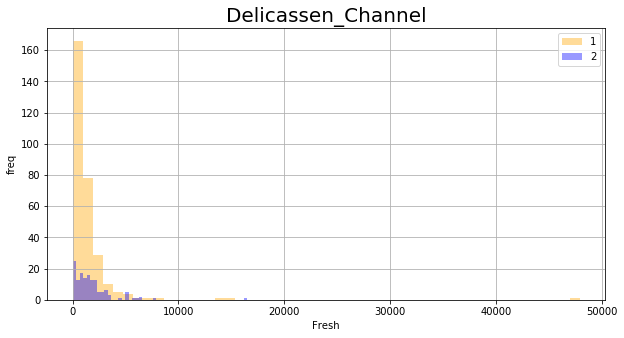

In [64]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10,5))

ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 1],bins=50, alpha=0.4, label = "1",color="orange")
ax1.hist(Wholesale["Delicassen"][Wholesale["Channel"] == 2],bins=50,alpha=0.4, label = "2", color="blue")
ax1.set_title('Delicassen_Channel',size=20)
ax1.set_xlabel('Fresh')
ax1.set_ylabel('freq')
ax1.grid(True)
ax1.legend(loc='upper right')

fig.show()

 - 対数変換後にk-means法により２分類した。
 - 「Fresh」「Frozen」以外の特徴量では、１と２のクラスター内の支出金額の分布は、Channel（２と１）ごとの支出金額の分布に近似している。

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。

《ヒント》

前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。

条件ごとにデータを見る際にはPandasのgroupbyが便利です。]

In [65]:
KM = ScratchKMeans(n_clusters = 5, max_iter = 15, verbose=False, tol=0, seed=3)
KM.fit(Wholesale_pca)
cl = KM.predict(Wholesale_pca)

In [66]:
Wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [67]:
data_cl0 = Wholesale_drop[cl==0]
data_cl1 = Wholesale_drop[cl==1]
data_cl2 = Wholesale_drop[cl==2]
data_cl3 = Wholesale_drop[cl==3]
data_cl4 = Wholesale_drop[cl==4]

In [68]:
cl_data=pd.DataFrame(cl)
cl_data = cl_data.rename(columns={0: "cluster"})
cl_data.shape

(440, 1)

In [69]:
Wholesale_drop = Wholesale_drop.drop(["cluster"],axis=1)

In [70]:
 Wholesale_add_cl= pd.concat([Wholesale_drop, cl_data], axis=1)
Wholesale_add_cl

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


In [71]:
Wholesale_mean_cl = Wholesale_add_cl.groupby("cluster").mean()
Wholesale_mean_cl.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5282.846154,10403.164835,16838.901099,1266.384615,7436.967033,1505.923077
1,9148.992337,2866.084291,3816.011494,2036.333333,996.831418,930.072797
2,27618.486486,5158.810811,5552.851351,7501.054054,964.486486,2474.351351
3,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
4,52022.000000,31696.000000,18490.750000,29825.500000,2699.000000,19656.250000


In [72]:
np.array(Wholesale_mean_cl.iloc[0])
Wholesale_mean_cl.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

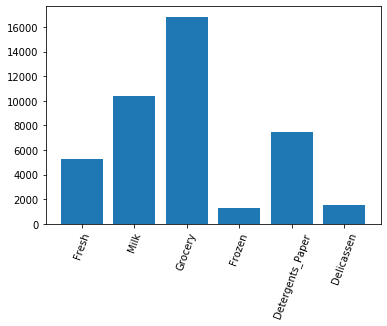

In [73]:
height = np.array(Wholesale_mean_cl.iloc[0])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

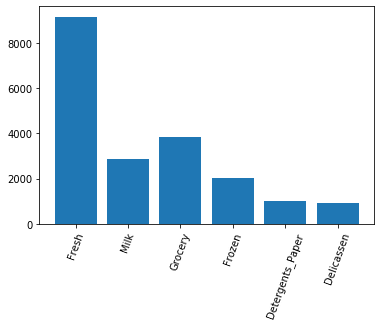

In [74]:
height = np.array(Wholesale_mean_cl.iloc[1])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

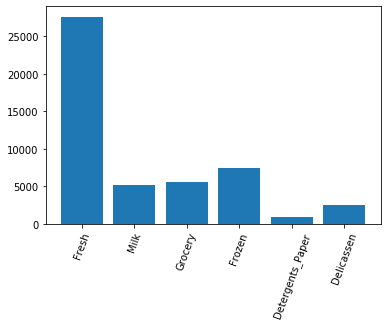

In [75]:
height = np.array(Wholesale_mean_cl.iloc[2])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

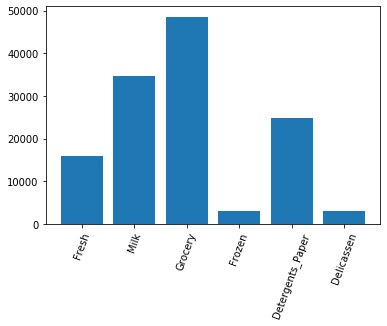

In [76]:
height = np.array(Wholesale_mean_cl.iloc[3])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

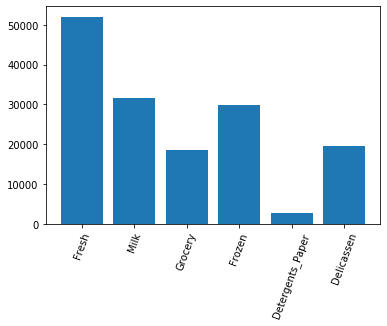

In [77]:
height = np.array(Wholesale_mean_cl.iloc[4])
plt.bar(Wholesale_mean_cl.columns, height)
plt.xticks(rotation=70)

 - クラスター０と３に分類されるクライアントの購入金額の内訳は類似している。Groceryの購入金額が高く、次いでFrozen・Delicassenの購入金額が高い。全体的な購入金額はクラスター０の方が３倍近く高い
 - クラスター１に分類されるクライアントはFreshの購入金額が最も高く、次いでGroceryが高い。
 - クラスター２に分類されるクライアントはFreshの購入金額が最も高く、次いでFreshの購入金額が高い。
 - クラスター４に分類されるクライアントはFreshの購入金額が最も高く、次いでMilk・Frozenの購入金額が高い。他のクラスターに比べて一つのカテゴリーに対する偏りが少ない。